<a href="https://colab.research.google.com/github/vihaveman/Breaking_Barriers/blob/Jibek/Breaking_barriers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
!pip install hvplot
!pip install holoviews hvplot

In [224]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import hvplot.pandas
import numpy as np

In [211]:
import pandas as pd
# Replace the file path with the correct location of the CSV file on your system
file_path = "/content/World_Bank.csv"
# Read the CSV file into a Pandas DataFrame and set the index to "Country Name"
df_technology_raw = pd.read_csv(file_path, index_col='Country Name')
# Review the DataFrame by displaying a random sample of 10 rows
df_technology_raw.sample(10)


,Country Code,Year,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Population Living In Slums,Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Country Name,,,,,,,,,,,,,,,,,,,
Colombia,COL,2012,32.51,2.84,565.87,36.76,8.60,48.98,615.03,22.79,21.35,107.17,4101.32,13.11,7.11,7.75,106.80,10.11,34.16
Montenegro,MNE,2020,81.12,-15.21,9.91,47.20,29.28,77.61,6.03,0.29,14.86,171.70,584.32,8.80,18.92,0.35,27.21,15.13,30.69
Namibia,NAM,2015,56.70,2.45,6.26,59.55,3.08,25.69,6.94,0.87,7.35,111.70,80.72,18.89,17.40,0.56,38.38,18.52,7.19
South Africa,ZAF,2010,50.93,1.82,2504.73,24.63,1.43,24.00,1675.90,21.09,23.00,97.27,862.05,25.71,53.20,65.96,186.03,20.51,45.72
Thailand,THA,2015,114.21,2.64,38815.03,32.42,8.86,39.32,4593.40,40.21,41.36,146.44,6524.11,5.12,7.20,76.26,94.43,0.58,62.66
Cote d'Ivoire,CIV,2012,1.96,5.43,96.85,27.22,0.21,4.40,17.45,7.84,14.99,82.23,397.12,57.83,7.63,0.32,26.08,7.22,15.58
West Bank and Gaza,PSE,2016,23.07,6.45,4.34,19.40,6.92,59.90,0.92,1.11,2.52,80.10,1817.41,19.54,29.20,2.29,125.09,23.00,12.68
Jordan,JOR,2010,23.42,0.09,122.35,15.55,4.23,27.20,7.82,1.71,23.96,95.51,3465.21,28.37,1.43,52.59,69.84,12.90,47.30
South Africa,ZAF,2015,65.50,-0.76,2818.23,32.42,2.52,51.92,1936.69,21.98,24.43,157.49,913.40,13.54,9.88,64.45,165.19,22.61,49.93


In [212]:
df_technology = df_technology_raw.drop(columns=['Country Code', 'Year'])

In [213]:
df_technology.shape
df_technology.columns

Index(['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export'],
      dtype='object')

Part 1: Scale the DataFrame and create a new DataFrame that contains the scaled data.

In [214]:
data_scaled = StandardScaler().fit_transform(
    df_technology[['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']]
)

In [215]:
# Create a DataFrame with the scaled data
df_technology_scaled = pd.DataFrame(
    data_scaled,
    columns=['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']
)
# Copy the tickers names from the original data
df_technology_scaled["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_scaled = df_technology_scaled.set_index("Countries")
# Display sample data
df_technology_scaled.sample(10)

,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Population Living In Slums,Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Countries,,,,,,,,,,,,,,,,,
Turkiye,1.518068,-0.387939,-0.090287,0.688669,1.441965,1.414791,0.806817,-0.066162,1.082926,-0.419878,-0.538223,-0.779744,0.356697,1.786903,1.017396,0.372807,0.494947
Belarus,0.071356,0.050271,-0.355500,-0.424261,2.734767,0.190813,-0.515766,-0.397580,1.705381,-0.001520,-0.555516,-0.696143,-0.442567,-0.524062,-1.059129,-0.412142,0.303518
Ukraine,1.537839,-0.287710,-0.209082,-0.430487,0.157715,-0.335493,-0.009183,-0.199196,0.839138,0.647311,-0.050628,-1.089665,-1.007565,-0.490965,0.385555,-0.132753,0.518181
Belarus,0.563592,-0.989311,-0.356232,0.993752,3.515864,1.285023,-0.409441,-0.397580,1.334254,0.239600,-0.552536,-0.878871,-0.497689,-0.524549,-0.922100,-0.467022,0.369685
Bangladesh,-1.209345,0.831123,-0.394081,-1.614239,-0.932685,-1.704161,-0.582958,0.215776,-1.150540,-1.449491,0.258877,2.054333,-0.555567,-0.440832,0.562337,-0.814595,-1.640063
Peru,-0.003298,0.744879,-0.386924,-0.317637,-0.222856,-0.157797,-0.426425,-0.263613,-0.773548,-0.344724,-0.417311,-0.605376,1.174336,-0.391673,0.150173,-0.899410,-1.437018
Thailand,1.640445,1.145794,2.303238,0.394482,-0.057514,-0.733840,1.836524,0.020543,1.491753,0.398989,-0.237565,-0.543870,0.136211,2.300397,-0.313859,-1.328471,1.264197
India,-0.621661,-1.949642,1.168828,1.118276,-0.754515,0.032559,5.648276,5.390561,1.815966,-0.863288,5.449575,1.729483,-0.838525,1.681771,3.025362,-0.355599,0.274728
Costa Rica,0.494734,-0.073267,-0.178052,-0.597815,0.454190,0.147858,-0.427230,-0.429321,-0.061453,1.197503,-0.579426,-1.007258,1.119215,-0.521629,-1.095024,0.076788,1.407643


Part 2. Use the Elbow Method to determine the optimal number of clusters for KMeans.

In [216]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [217]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))

In [218]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_technology_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [219]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,5576.000000
1,2,4592.045731
2,3,3783.307613
3,4,3263.269672
4,5,2929.124216


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

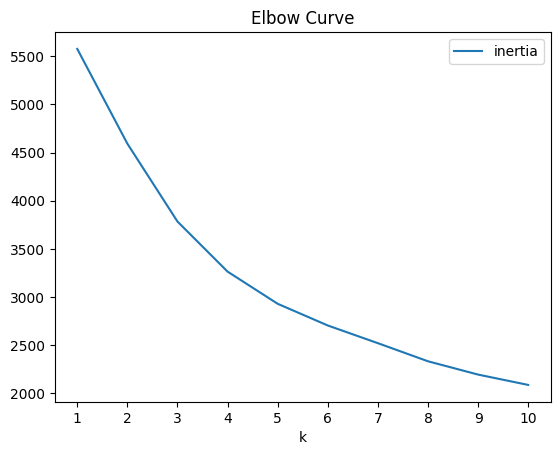

In [225]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)


Part 3: Segment the data with K-means using the optimal number of clusters

In [226]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=5, random_state=0)
# Fit the model
model.fit(df_technology_scaled)
# Make predictions
kmeans_predictions = model.predict(df_technology_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_predictions[-10:]

array([3, 1, 1, 0, 4, 0, 4, 4, 4, 3], dtype=int32)

Part 4. Cluster the data using AgglomerativeClustering and Birch

In [227]:
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_predictions = agglo_model.fit_predict(df_technology_scaled)

In [228]:
agglo_predictions[-10:]

array([2, 0, 0, 1, 0, 4, 0, 1, 0, 2])

In [229]:
birch_model = Birch(n_clusters=5)
birch_model.fit(df_technology_scaled)
birch_predictions = birch_model.predict(df_technology_scaled)

In [230]:
# Previewing the predicted customer classifcations for Birch
birch_predictions[-10:]

array([2, 0, 0, 2, 0, 1, 0, 0, 0, 4])

Part 5. Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch

In [231]:
# Create a copy of the customers_df DataFrame
technology_predictions_df = df_technology_scaled.copy()
# Add class columns with the labels to the new DataFrame
technology_predictions_df["kmeans-segments"] = kmeans_predictions
technology_predictions_df["agglomerative-segments"] = agglo_predictions
technology_predictions_df["birch-segments"] = birch_predictions
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
Countries,,,
Argentina,1,1,0
Bangladesh,4,2,4
Belarus,1,1,0


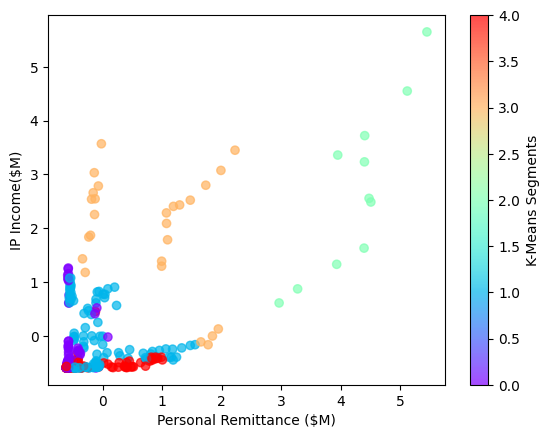

In [232]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["kmeans-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="K-Means Segments")

# Show the plot
plt.show()

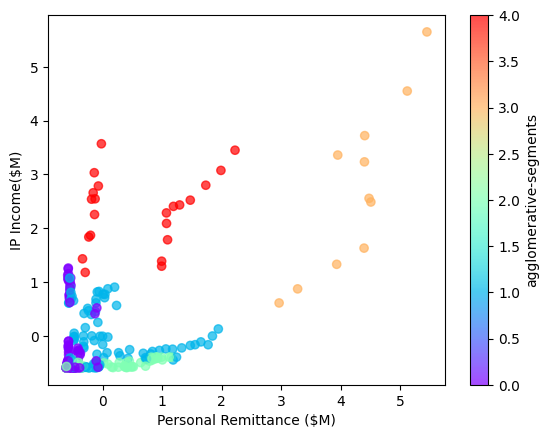

In [233]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["agglomerative-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="agglomerative-segments")

# Show the plot
plt.show()

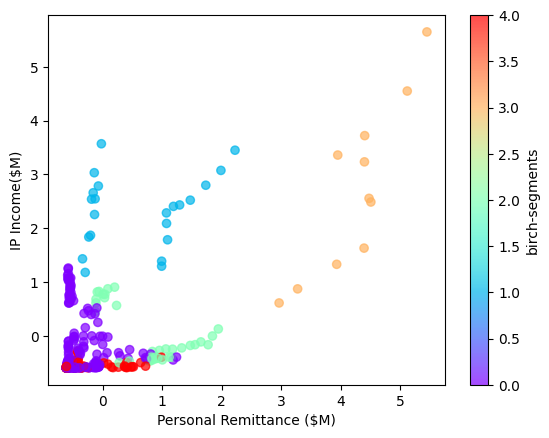

In [234]:
# Plot the birch clusters using the "feature_1" and "feature_2" columns
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["birch-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="birch-segments")

# Show the plot
plt.show()

In [235]:
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].corr()

,kmeans-segments,agglomerative-segments,birch-segments
kmeans-segments,1.000000,0.606570,0.785411
agglomerative-segments,0.606570,1.000000,0.513175
birch-segments,0.785411,0.513175,1.000000


Part 6: Reduce the number of features to two principal components on the df_stocks_scaled DataFrame, and calculate the explained variance ratio that results from the PCA data.

In [236]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=6)

In [237]:
# Fit the df_stocks_scaled data to the PCA
tech_pca_data = pca.fit_transform(df_technology_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
tech_pca_data[:5]

array([[-0.50095051,  0.04702712, -0.73316725, -1.02752741, -0.63303193,
        -0.90601527],
       [ 2.57702189, -3.26639113, -1.28551719, -1.34922294,  0.8112477 ,
         1.49085067],
       [-0.70290824,  0.02342228, -1.42775365,  0.04245144, -1.07810804,
        -1.17928107],
       [ 0.36776176, -0.45650705,  0.14070777,  0.61535456,  0.1416556 ,
        -0.68538077],
       [-0.73739974, -0.58997983, -2.09752457,  0.02107079,  0.59887239,
        -0.14323667]])

In [238]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.24964674, 0.23843978, 0.0839197 , 0.06989996, 0.06631387,
       0.05919684])

In [239]:
import numpy as np
# Fit the PCA model to your data
pca.fit(df_technology_scaled)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_technology_scaled.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is Personal Remittance ($M)
Component 2: Most important feature is IP Income($M)
Component 3: Most important feature is High Tech Import
Component 4: Most important feature is Poverty Count
Component 5: Most important feature is Unemployment Rate
Component 6: Most important feature is Poverty Count


Part 7: Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [241]:
# Creating a DataFrame with the PCA data
df_technology_pca = pd.DataFrame(tech_pca_data, columns=["PC1", "PC2","PC3","PC4","PC5","PC6"])
# Copy the tickers names from the original data
df_technology_pca["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_pca = df_technology_pca.set_index("Countries")
# Review the DataFrame
df_technology_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
Countries,,,,,,
Argentina,-0.500951,0.047027,-0.733167,-1.027527,-0.633032,-0.906015
Bangladesh,2.577022,-3.266391,-1.285517,-1.349223,0.811248,1.490851
Belarus,-0.702908,0.023422,-1.427754,0.042451,-1.078108,-1.179281
Colombia,0.367762,-0.456507,0.140708,0.615355,0.141656,-0.685381
Costa Rica,-0.737400,-0.589980,-2.097525,0.021071,0.598872,-0.143237


Part 8: Two principal components for the x- and y-axes. Be sure to style and format your plot.

In [242]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=5)
# Fit the model for the df_stocks_pca DataFrame
model.fit(df_technology_pca)
# Predict the model segments (clusters)
tech_clusters = model.predict(df_technology_pca)
# Print the stock segments
print(tech_clusters)

[0 4 0 0 0 4 0 4 3 4 0 2 4 4 1 2 0 4 4 4 2 4 4 0 1 0 0 0 4 4 2 4 2 0 0 4 4
 4 3 4 0 2 4 2 1 2 0 0 4 4 2 4 0 0 1 0 0 0 4 4 2 4 2 0 2 4 0 4 3 4 0 2 4 0
 1 2 0 4 4 4 2 4 1 0 1 0 0 0 4 4 2 4 2 0 2 4 0 4 3 4 0 2 4 0 1 2 0 0 4 4 2
 4 1 0 1 0 0 0 0 4 2 4 2 0 2 4 0 4 3 4 0 2 4 0 1 2 0 0 4 4 2 4 1 0 1 0 0 0
 0 4 2 4 2 0 2 4 0 4 3 0 0 2 4 0 1 2 0 0 4 4 2 1 0 1 0 0 0 0 4 2 4 2 0 2 4
 0 4 3 0 0 2 4 0 1 2 0 0 4 4 2 2 1 0 1 0 0 0 0 4 2 4 2 0 2 4 0 4 3 0 0 2 4
 0 1 2 0 0 4 4 2 2 1 0 1 0 0 0 0 4 2 4 2 0 2 4 0 4 3 0 0 2 4 0 1 2 0 0 4 4
 2 2 1 0 1 0 0 0 0 4 2 4 2 2 2 4 0 4 3 0 0 2 4 0 1 2 0 0 4 4 2 2 1 0 1 0 0
 0 0 4 2 4 2 2 2 4 0 4 3 0 0 2 4 0 1 2 0 0 0 4 2 2 1 0 1 0 0 0 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [243]:
# Create a copy of the DataFrame and name it as df_stocks_pca_predictions
df_tech_pca_predictions = df_technology_pca.copy()
# Create a new column in the DataFrame with the predicted clusters
df_tech_pca_predictions["TechCluster"] = tech_clusters
# Review the DataFrame
df_tech_pca_predictions.head()

,PC1,PC2,PC3,PC4,PC5,PC6,TechCluster
Countries,,,,,,,
Argentina,-0.500951,0.047027,-0.733167,-1.027527,-0.633032,-0.906015,0
Bangladesh,2.577022,-3.266391,-1.285517,-1.349223,0.811248,1.490851,4
Belarus,-0.702908,0.023422,-1.427754,0.042451,-1.078108,-1.179281,0
Colombia,0.367762,-0.456507,0.140708,0.615355,0.141656,-0.685381,0
Costa Rica,-0.737400,-0.589980,-2.097525,0.021071,0.598872,-0.143237,0


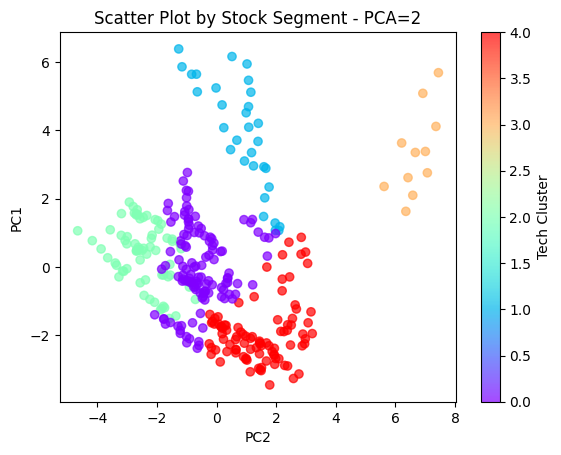

In [244]:
# Create the scatter plot with x="PC1" and y="PC2"
# Create a scatter plot with different colors for each cluster
plt.scatter(
    x=df_tech_pca_predictions["PC1"],
    y=df_tech_pca_predictions["PC2"],
    c=df_tech_pca_predictions["TechCluster"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.colorbar(label="Tech Cluster")

# Add the title
plt.title("Scatter Plot by Stock Segment - PCA=2")

# Show the plot
plt.show()